#About Data


In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [2]:
import chardet
import pandas as pd

with open('/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
#first failed to read the initial encoding, this code helped from stackoverflow https://stackoverflow.com/questions/33819557/unicodedecodeerror-utf-8-codec-while-reading-a-csv-file

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv', encoding=result['encoding'])



In [6]:

data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday


In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

In [7]:
#data Columns information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [8]:
#count of missing values in each column.
data.isna().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


In [9]:
# Find duplicate records in the data
duplicates = data[data.duplicated()]
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)
print(duplicates)

Number of duplicate rows: 0
Empty DataFrame
Columns: [Date, Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day, year, month, day]
Index: []


##Conclusion
This dataset has 14 features (columns) and 8760 rows.

'Rented Bike Count' is the key attribute for this set

The data does not have any null values or duplicated records.

#Data Exploration

QUESTIONS WE HAVE TO ANSWER


1. Which season has the most bike rentals?
2. In which month or day are most bike rentals?
3. Which attribute has the biggest effect on our variable?
4. How do the types of days or seasons affect bike rental count?
5. How do weather conditions affect bike rental count?


Start by separating day, months , and year to create their columns

In [3]:
import datetime as dt
#data['Date'] = data['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day_name()
data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday


##Seasons

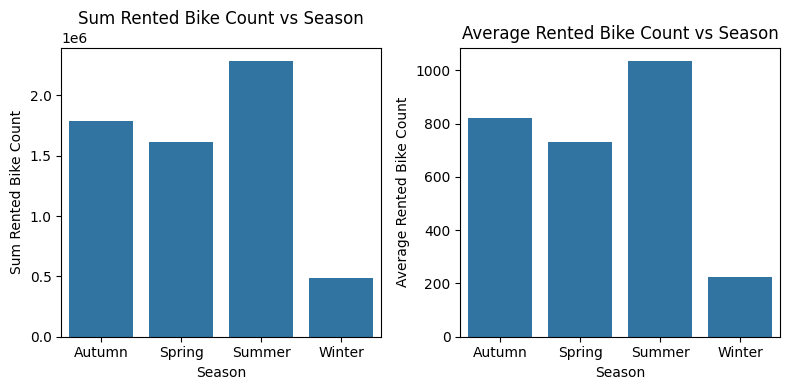

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum and average rented bike count by season
# I want to plot both bar graphs next to each other side by side

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# sum
sum_count = data.groupby('Seasons')['Rented Bike Count'].sum()
sns.barplot(x=sum_count.index, y=sum_count.values, ax=axes[0])
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Sum Rented Bike Count')
axes[0].set_title('Sum Rented Bike Count vs Season')

# average
average_count = data.groupby('Seasons')['Rented Bike Count'].mean()
sns.barplot(x=average_count.index, y=average_count.values, ax=axes[1])
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Average Rented Bike Count')
axes[1].set_title('Average Rented Bike Count vs Season')

plt.tight_layout()
plt.show()

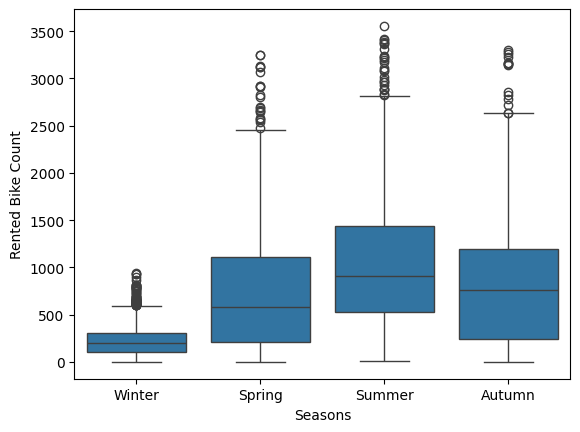

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

figsize=(8, 4)
sns.boxplot(x='Seasons', y='Rented Bike Count', data=data)
plt.show()

##Calendar

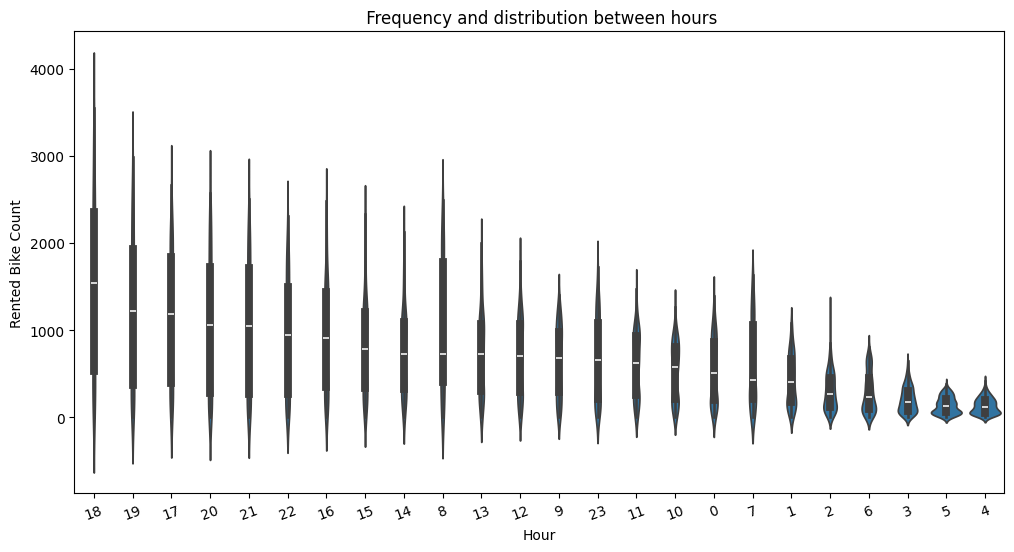

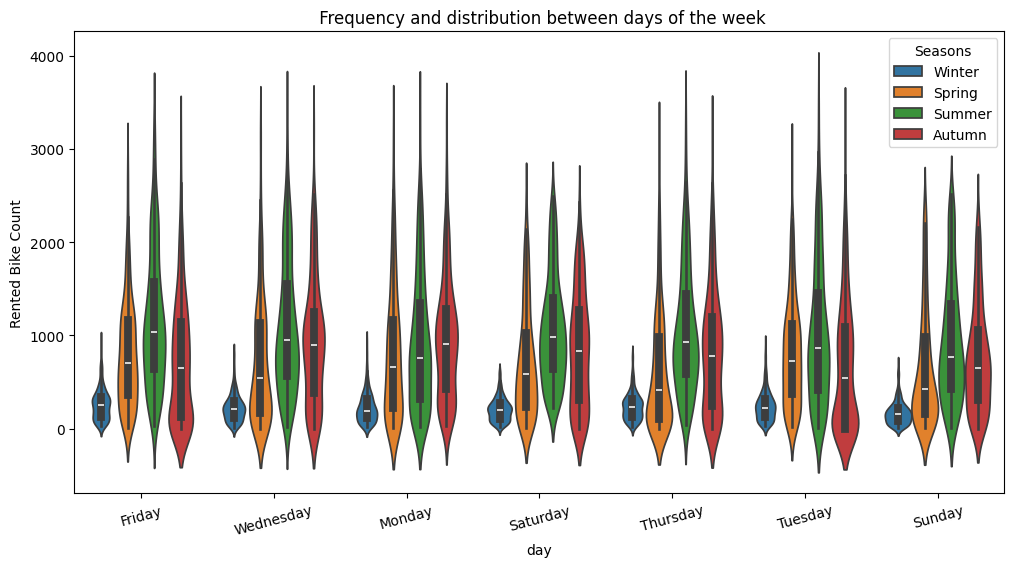

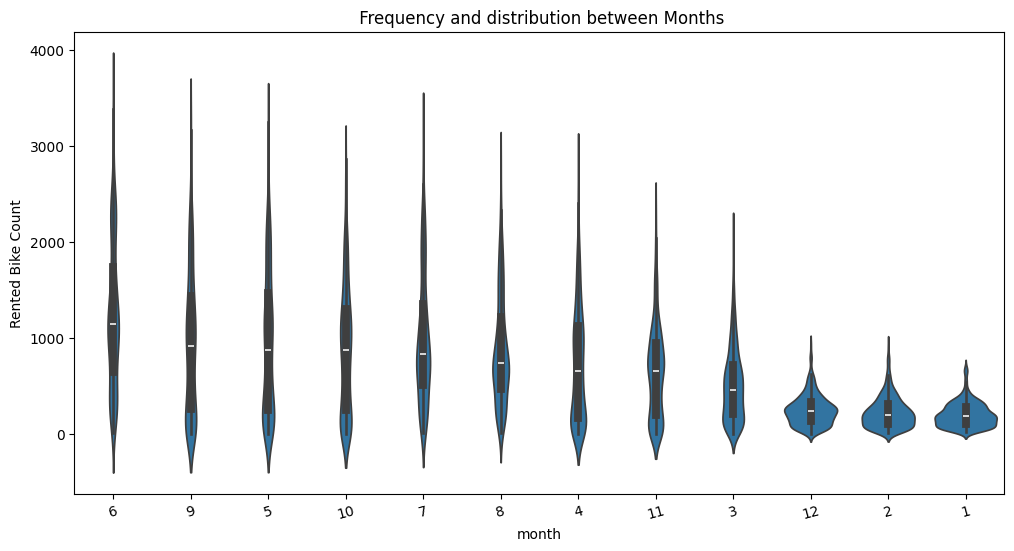

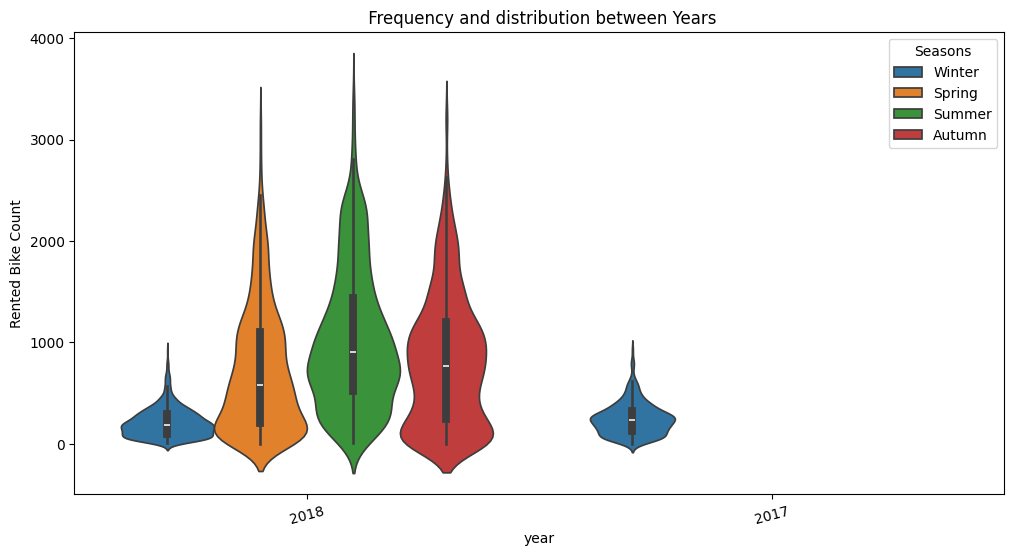

In [42]:
# @Hours, day, months distribution.


plt.figure(figsize=(12,6), dpi=100)
plt.title(' Frequency and distribution between hours')
my_order = data.groupby(by=["Hour"])["Rented Bike Count"].median().sort_values().iloc[::-1].index
sns.violinplot(data=data, x='Hour', y='Rented Bike Count', order=my_order) # Comparing Hours
plt.xticks(rotation=20);
plt.show()

plt.figure(figsize=(12,6), dpi=100)
plt.title(' Frequency and distribution between days of the week')
my_order = data.groupby(by=["day"])["Rented Bike Count"].median().sort_values().iloc[::-1].index
# Specifying the 'order' parameter with my_order and plotting
sns.violinplot(data=data, x='day', y='Rented Bike Count', hue="Seasons", order=my_order) # Comparing days
plt.xticks(rotation=15);
plt.show()

plt.figure(figsize=(12,6), dpi=100)
plt.title(' Frequency and distribution between Months')
my_order = data.groupby(by=["month"])["Rented Bike Count"].median().sort_values().iloc[::-1].index
sns.violinplot(data=data, x='month', y='Rented Bike Count', order=my_order) # Comparing Months
plt.xticks(rotation=15);
plt.show()

plt.figure(figsize=(12,6), dpi=100)
plt.title(' Frequency and distribution between Years')
my_order = data.groupby(by=["year"])["Rented Bike Count"].median().sort_values().iloc[::-1].index
sns.violinplot(data=data, x='year', y='Rented Bike Count',hue="Seasons", order=my_order) # Comparing Years
plt.xticks(rotation=15);
plt.show()





In [57]:
# @title Effect of functioning days and Holiday

functioning_day_counts = data.groupby('Functioning Day')['Rented Bike Count'].sum()
print(functioning_day_counts)
print('\n')
holiday_counts = data.groupby('Holiday')['Rented Bike Count'].sum()
print(holiday_counts)




Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64


Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64


##Weather

Started by analysing how weather conditions influence each other.
The heatmap shows the correlation between weather conditions in the dataset.

In [127]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv', encoding=result['encoding'])
data.head(2)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


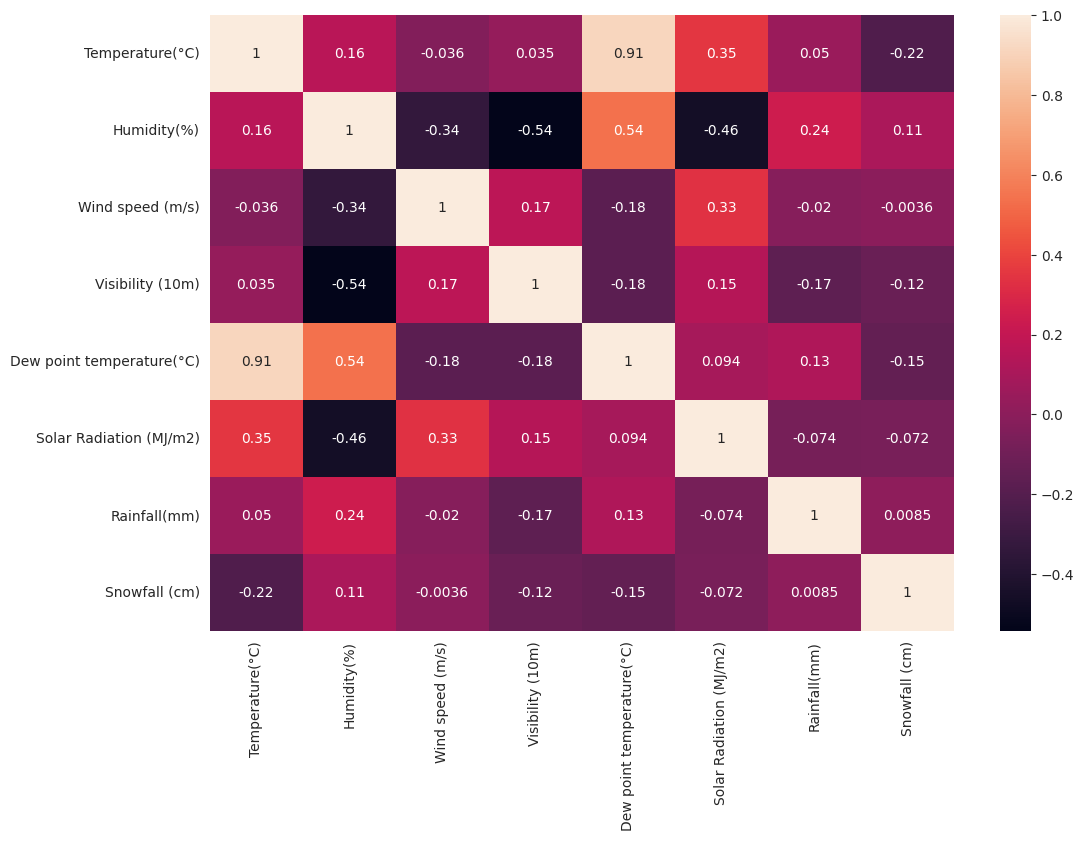

In [128]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)', 'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)' ]].corr(), annot=True)
plt.show()



Temperature and Dew point temperature have high correlation while Rainfall and snowfall have high correlation.

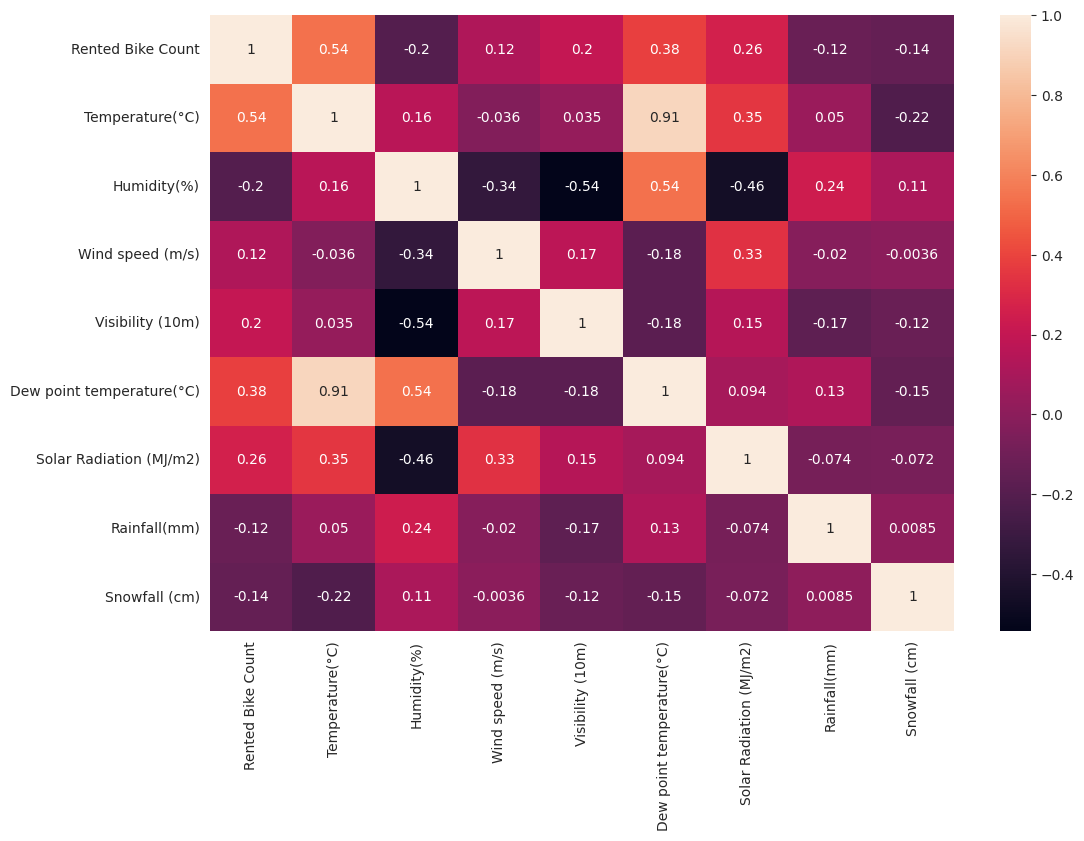

In [133]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[[ 'Rented Bike Count','Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)', 'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)' ]].corr(), annot=True)
plt.show()

##Data Cleaning

In [129]:
data = data.drop('Functioning Day', axis=1)
data = data.drop('Date', axis=1)
data['Seasons'] = data['Seasons'].map({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3})
data['Holiday'] = data['Holiday'].map({'No Holiday': 0, 'Holiday': 1, 'None': 2})

data.head(1)


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0


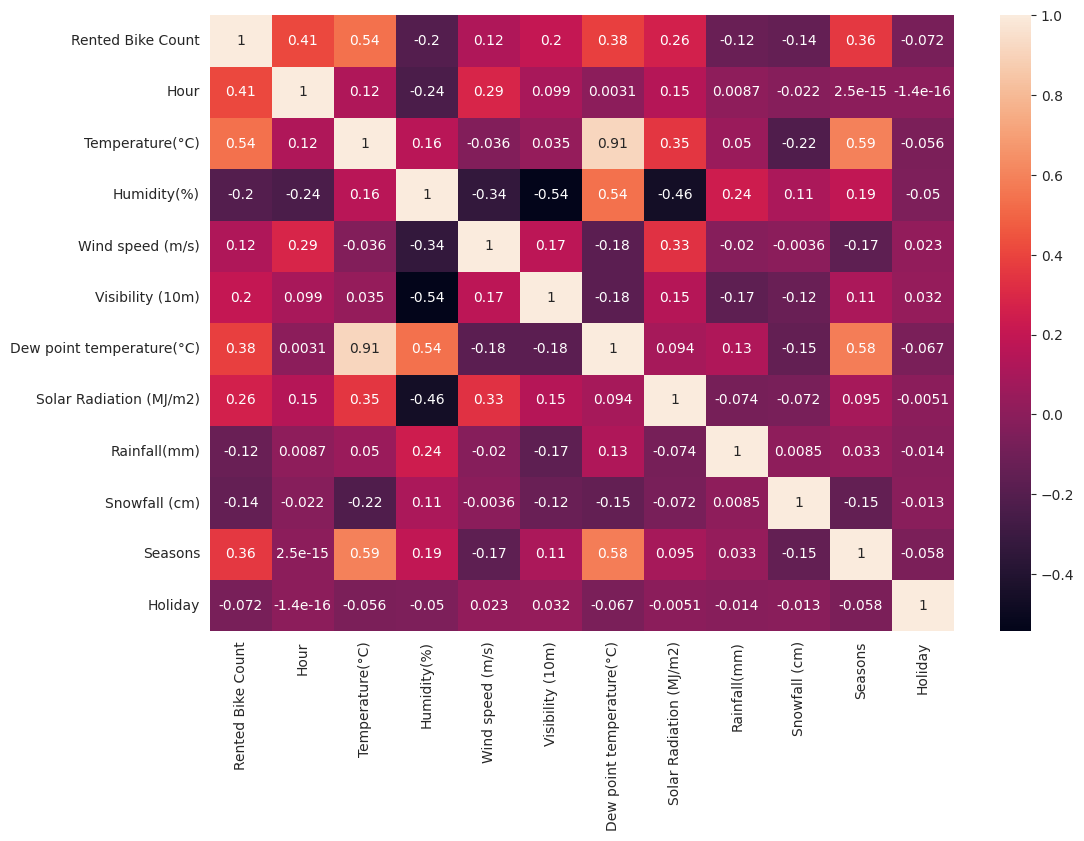

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [130]:
# @title Which features have the highest correlation

correlation_matrix = data.corr()
correlation_with_rented_bike_count = correlation_matrix['Rented Bike Count'].sort_values(ascending=False)

print("Features with highest correlation with 'Rented Bike Count':")
print(correlation_with_rented_bike_count)

threshold = 0.5
high_correlations = correlation_with_rented_bike_count[abs(correlation_with_rented_bike_count) > threshold]
print("\nFeatures with correlation above", threshold, ":")
print(high_correlations)


Features with highest correlation with 'Rented Bike Count':
Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Seasons                      0.359687
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Holiday                     -0.072338
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64

Features with correlation above 0.5 :
Rented Bike Count    1.000000
Temperature(°C)      0.538558
Name: Rented Bike Count, dtype: float64


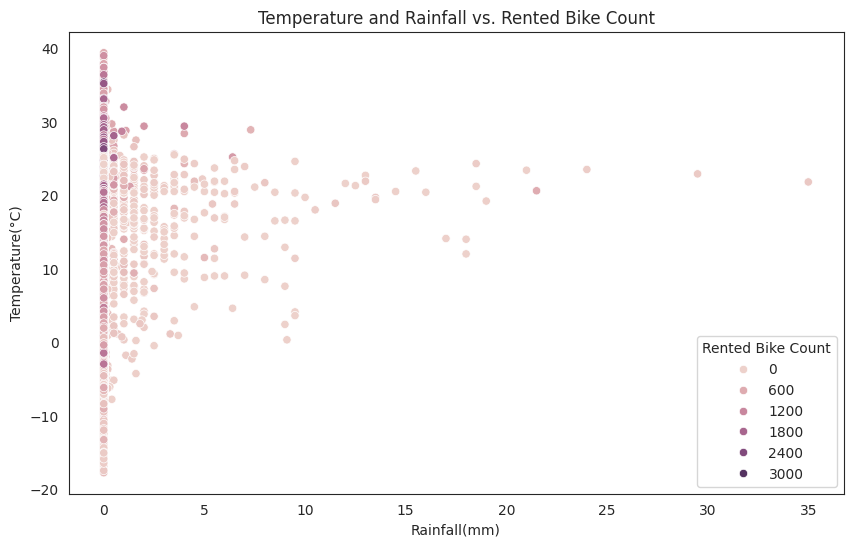

In [105]:
# Temperature and Humidity vs. Rented Bike Count
import matplotlib.pyplot as plt
import seaborn as sns

# To keep the background white
sns.set_style("white")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rainfall(mm)', y='Temperature(°C)', hue='Rented Bike Count', data=data)
plt.xlabel('Rainfall(mm)')
plt.ylabel('Temperature(°C)')
plt.title('Temperature and Rainfall vs. Rented Bike Count')
plt.show()


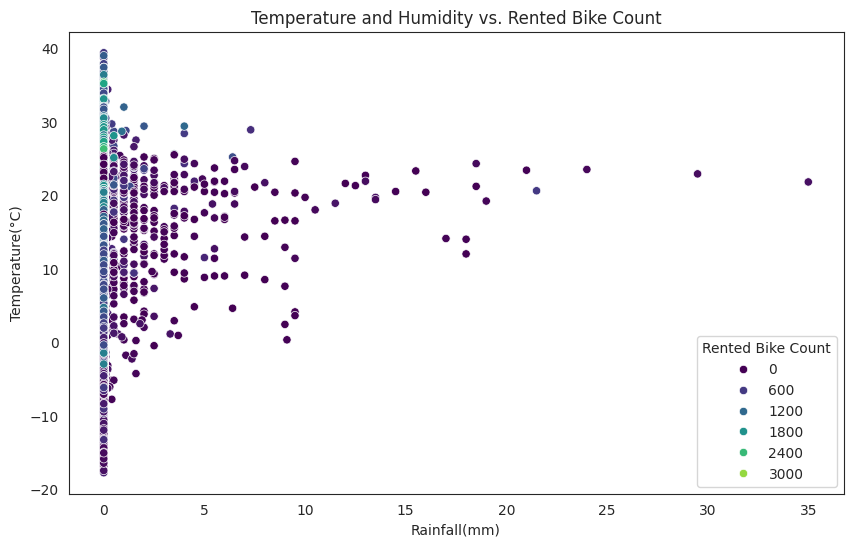

In [104]:
# Temperature and Humidity vs. Rented Bike Count

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rainfall(mm)', y='Temperature(°C)', hue='Rented Bike Count', data=data, palette="viridis")
plt.xlabel('Rainfall(mm)')
plt.ylabel('Temperature(°C)')
plt.title('Temperature and Humidity vs. Rented Bike Count')
plt.show()


Text(0.5, 1.0, 'Windspeed and Humidity vs. Rented Bike Count')

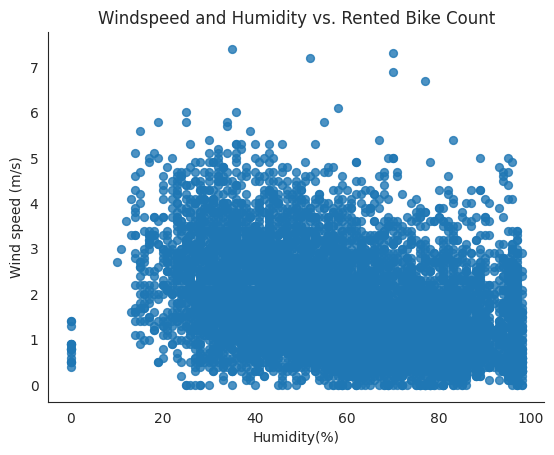

In [106]:
# @title Humidity(%) vs Wind speed (m/s)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Humidity(%)', y='Wind speed (m/s)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Windspeed and Humidity vs. Rented Bike Count')

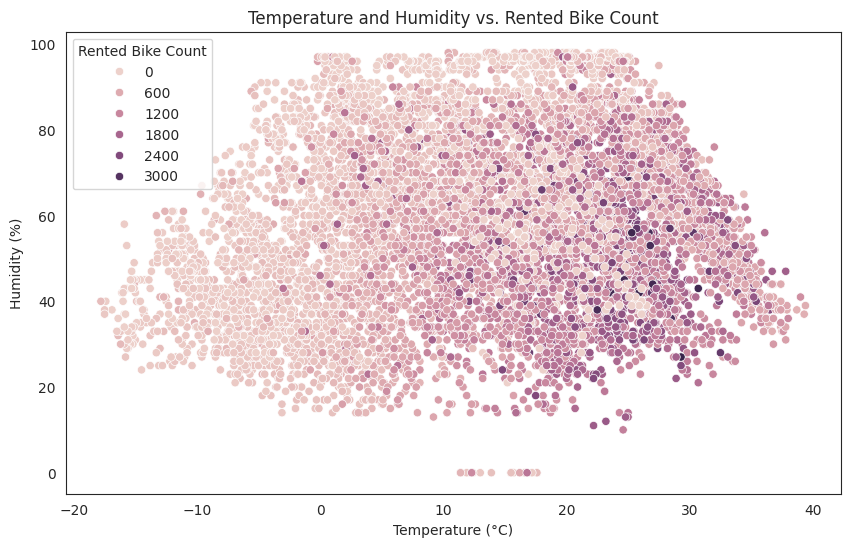

In [107]:
# Temperature and Humidity vs. Rented Bike Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Humidity(%)', hue='Rented Bike Count', data=data)
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature and Humidity vs. Rented Bike Count')
plt.show()


Temperature, humidity vs rented bike count